In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df1=pd.read_csv(r"C:/Users/KIIT/Documents/jupyter notebook/linearX.csv")
df2=pd.read_csv(r"C:/Users/KIIT/Documents/jupyter notebook/linearY.csv")

In [41]:
X = df1.values
Y = df2.values

In [42]:
X = (X - np.mean(X)) / np.std(X)
Y = Y.reshape(-1, 1)
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [43]:
def gradient_descent(X, Y, theta, learning_rate, iterations, epsilon=1e-6):
    m = len(Y)
    cost_history = []
    for i in range(iterations):
        predictions = X.dot(theta)
        error = predictions - Y
        gradient = (1/m) * X.T.dot(error)
        theta -= learning_rate * gradient
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < epsilon:
            break
    return theta, cost_history

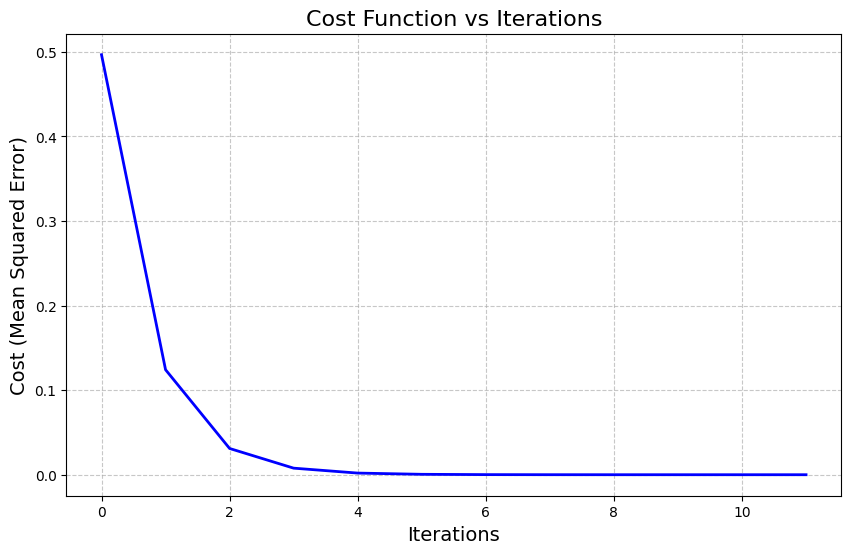

In [44]:
theta = np.zeros((X.shape[1], 1))
learning_rate = 0.5
iterations = 1000
theta, cost_history = gradient_descent(X, Y, theta, learning_rate, iterations)

plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, color='blue', linewidth=2)
plt.title("Cost Function vs Iterations", fontsize=16)
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Cost (Mean Squared Error)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

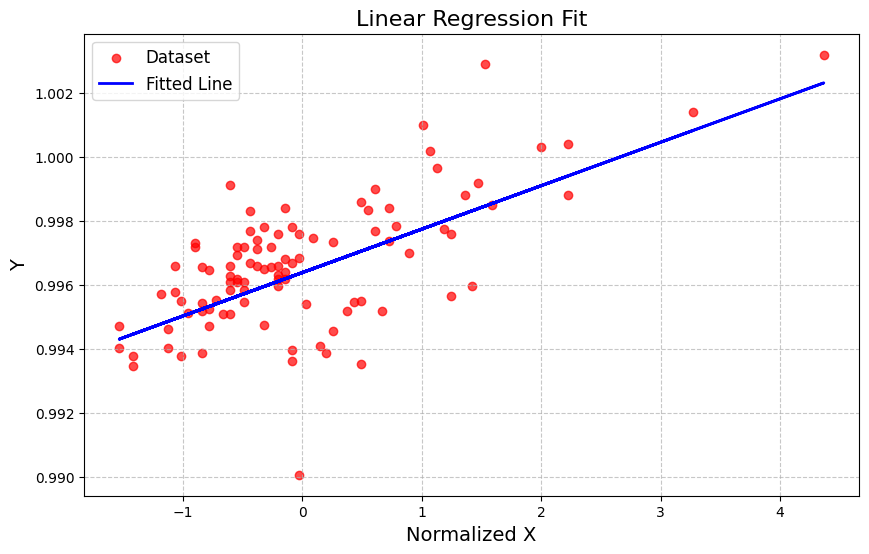

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], Y, color='red', label='Dataset', alpha=0.7)
plt.plot(X[:, 1], X.dot(theta), color='blue', linewidth=2, label='Fitted Line')
plt.title("Linear Regression Fit", fontsize=16)
plt.xlabel("Normalized X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


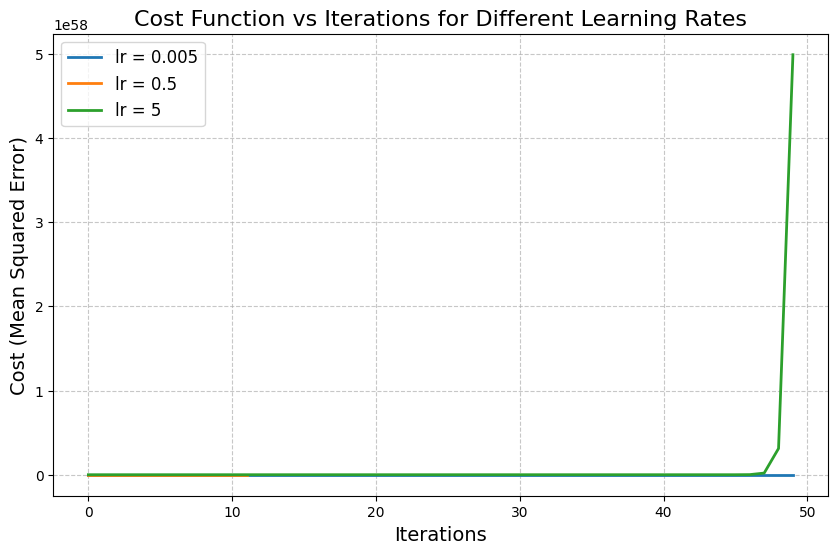

In [46]:
learning_rates = [0.005, 0.5, 5]
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    theta_temp = np.zeros((X.shape[1], 1))
    theta_temp, cost_history_temp = gradient_descent(X, Y, theta_temp, lr, 50)
    plt.plot(range(len(cost_history_temp)), cost_history_temp, label=f"lr = {lr}", linewidth=2)
plt.title("Cost Function vs Iterations for Different Learning Rates", fontsize=16)
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Cost (Mean Squared Error)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [47]:
def stochastic_gradient_descent(X, Y, theta, learning_rate, iterations):
    m = len(Y)
    cost_history = []
    for _ in range(iterations):
        for i in range(m):
            xi = X[i, :].reshape(1, -1)
            yi = Y[i]
            prediction = xi.dot(theta)
            error = prediction - yi
            gradient = xi.T.dot(error)
            theta -= learning_rate * gradient
        cost = (1/(2*m)) * np.sum((X.dot(theta) - Y)**2)
        cost_history.append(cost)
    return theta, cost_history

def mini_batch_gradient_descent(X, Y, theta, learning_rate, iterations, batch_size):
    m = len(Y)
    cost_history = []
    for _ in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            Y_batch = Y_shuffled[i:i+batch_size]
            predictions = X_batch.dot(theta)
            error = predictions - Y_batch
            gradient = (1/len(Y_batch)) * X_batch.T.dot(error)
            theta -= learning_rate * gradient
        cost = (1/(2*m)) * np.sum((X.dot(theta) - Y)**2)
        cost_history.append(cost)
    return theta, cost_history


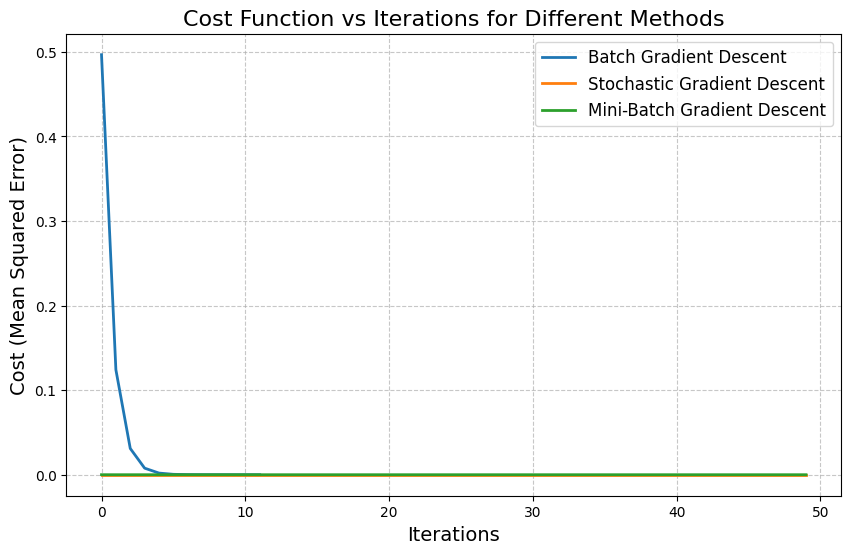

In [50]:
batch_theta, batch_cost = gradient_descent(X, Y, np.zeros((X.shape[1], 1)), 0.5, 50)
stochastic_theta, stochastic_cost = stochastic_gradient_descent(X, Y, np.zeros((X.shape[1], 1)), 0.5, 50)
mini_batch_theta, mini_batch_cost = mini_batch_gradient_descent(X, Y, np.zeros((X.shape[1], 1)), 0.5, 50, batch_size=16)


plt.figure(figsize=(10, 6))
plt.plot(range(len(batch_cost)), batch_cost, label="Batch Gradient Descent", linewidth=2)
plt.plot(range(len(stochastic_cost)), stochastic_cost, label="Stochastic Gradient Descent", linewidth=2)
plt.plot(range(len(mini_batch_cost)), mini_batch_cost, label="Mini-Batch Gradient Descent", linewidth=2)
plt.title("Cost Function vs Iterations for Different Methods", fontsize=16)
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Cost (Mean Squared Error)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()